In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv
/kaggle/input/covid19-global-forecasting-week-2/train.csv


In [2]:
train=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-2/train.csv')
test=pd.read_csv('/kaggle/input/covid19-global-forecasting-week-2/test.csv')

In [3]:
train.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
19105,29361,NaN,Zimbabwe,2020-03-22,3.0,0.0
19106,29362,NaN,Zimbabwe,2020-03-23,3.0,1.0
19107,29363,NaN,Zimbabwe,2020-03-24,3.0,1.0
19108,29364,NaN,Zimbabwe,2020-03-25,3.0,1.0
19109,29365,NaN,Zimbabwe,2020-03-26,3.0,1.0


In [4]:
training_data=train.groupby('Date')['ConfirmedCases','Fatalities'].sum().reset_index()

In [5]:
training_data=training_data.drop('Date',axis=1).copy()
training_data.shape

(65, 2)

In [6]:
train=training_data.iloc[0:50]
val=training_data.iloc[50:]

In [7]:
train.shape

(50, 2)

# **Scaling**

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scale_train_data=scaler.fit_transform(train)

In [9]:
x_train=[]
y_train=[]
for i in range(10,train.shape[0]):
    x_train.append(x_scale_train_data[i-10:i])
    y_train.append(x_scale_train_data[i,1])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape

(40, 10, 2)

# **Partition into train and test data**

In [12]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [14]:
model=Sequential()

model.add(LSTM(20,activation = 'relu',return_sequences=True,input_shape = (xTrain.shape[1],2)))
model.add(Dropout(0.5))

model.add(LSTM(20,activation = 'relu',return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(20,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='linear'))

In [15]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [16]:
history=model.fit(xTrain,yTrain,epochs=100,batch_size=16)

Train on 32 samples
Epoch 1/100
32/32 [==============================] - 3s 95ms/sample - loss: 0.3019
Epoch 2/100
32/32 [==============================] - 0s 915us/sample - loss: 0.2898
Epoch 3/100
32/32 [==============================] - 0s 933us/sample - loss: 0.2790
Epoch 4/100
32/32 [==============================] - 0s 921us/sample - loss: 0.2678
Epoch 5/100
32/32 [==============================] - 0s 895us/sample - loss: 0.2484
Epoch 6/100
32/32 [==============================] - 0s 890us/sample - loss: 0.2506
Epoch 7/100
32/32 [==============================] - 0s 834us/sample - loss: 0.2281
Epoch 8/100
32/32 [==============================] - 0s 839us/sample - loss: 0.2034
Epoch 9/100
32/32 [==============================] - 0s 815us/sample - loss: 0.2044
Epoch 10/100
32/32 [==============================] - 0s 825us/sample - loss: 0.1789
Epoch 11/100
32/32 [==============================] - 0s 857us/sample - loss: 0.1610
Epoch 12/100
32/32 [==============================] - 0

# **validation data**

In [17]:
val_data=train.tail(10).append(val,ignore_index = True)

In [18]:
val_data.head()

,ConfirmedCases,Fatalities
0,90208.0,3079.0
1,92722.0,3153.0
2,94971.0,3243.0
3,97665.0,3336.0
4,101532.0,3446.0


In [19]:
x_scale_val_data=scaler.transform(val_data)

In [20]:
x_scale_val_data.shape

(25, 2)

In [21]:
X_val = []
y_val = []
for i in range(10, val_data.shape[0]):
    X_val.append(x_scale_val_data[i-10:i])
    y_val.append(x_scale_val_data[i, 1])

In [22]:
x_val, y_val = np.array(X_val), np.array(y_val)

In [23]:
scaler.scale_

array([7.98568964e-06, 2.17485863e-04])

In [24]:
scale=1/ 2.17485863e-04

# **Prediction**

In [25]:
y_pred=model.predict(x_val)

In [26]:
y_new_pred=y_pred*scale
y_val=y_val*scale

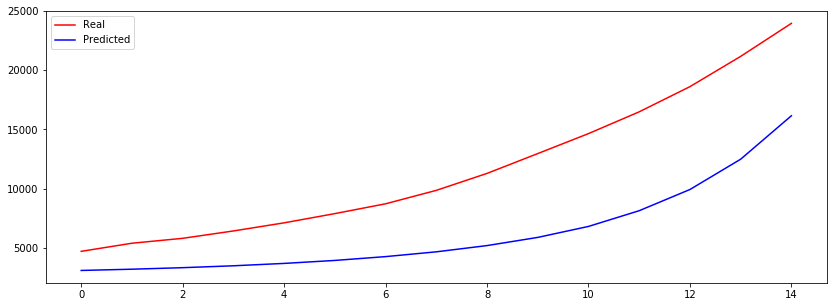

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(14,5))
plt.plot(y_val, color = 'red', label = 'Real')
plt.plot(y_new_pred, color = 'blue', label = 'Predicted')
# plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()